In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk 
import seaborn as sns
from scipy.stats import probplot

In [67]:
train = pd.read_csv('train.csv')

In [70]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## 1. Home Planet 
The planet the passenger departed from, typically their planet of permanent residence.

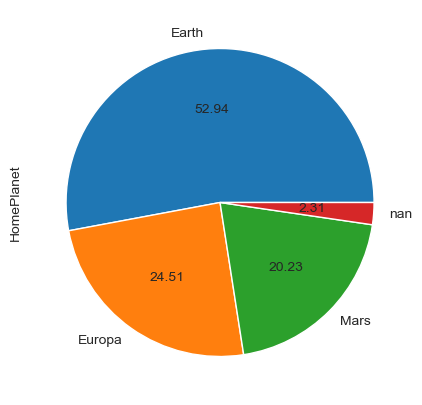

In [72]:
plt.figure(figsize=(15,5))
train['HomePlanet'].value_counts(dropna=False).plot(kind='pie',autopct='%2.2f')
plt.show()

In [73]:
train['HomePlanet'].mode()[0]

'Earth'

In [74]:
(train['HomePlanet'].value_counts(dropna=False)/train['HomePlanet'].shape[0])*100

Earth     52.939146
Europa    24.513977
Mars      20.234672
NaN        2.312205
Name: HomePlanet, dtype: float64

In [75]:
# drop HomePlanet
train = pd.concat((train,pd.get_dummies(train['HomePlanet'].fillna(train['HomePlanet'].mode()[0]),drop_first=True)),axis=1)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Europa        8693 non-null   uint8  
 15  Mars          8693 non-null   uint8  
dtypes: bool(1), float64(6), object(7), uint8(2)
memory usage: 908.5+ KB


## 2. CryoSleep 
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

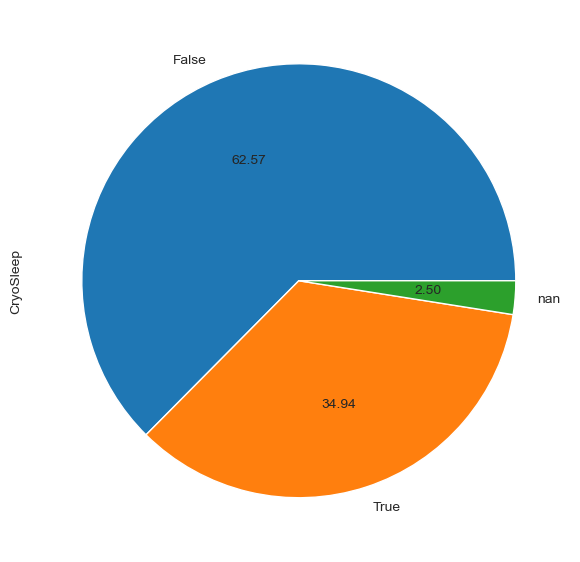

In [77]:
plt.figure(figsize=(7,8))
sns.set_style('darkgrid')
train['CryoSleep'].value_counts(dropna=False).plot(kind='pie',autopct='%2.2f')
sns.despine()
plt.show()

In [78]:
train['CryoSleep'].mode()[0]

False

In [79]:
train['CryoSleepBool'] = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0]).apply(lambda m: bool(m))

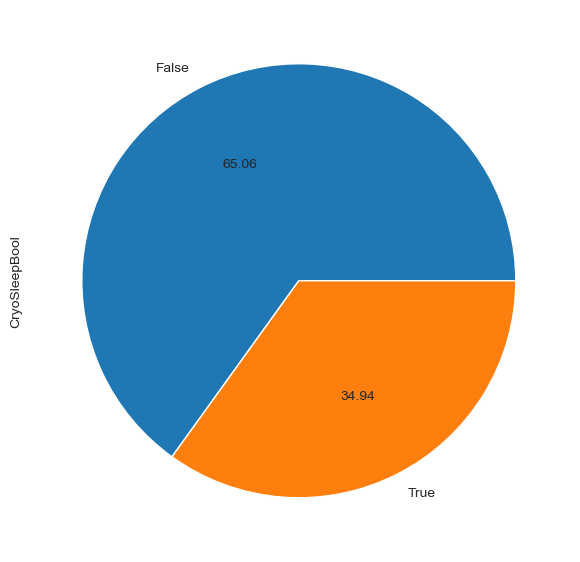

In [80]:
plt.figure(figsize=(7,8))
sns.set_style('darkgrid')
train['CryoSleepBool'].value_counts(dropna=False).plot(kind='pie',autopct='%2.2f')
sns.despine()
plt.show()

## 3. Cabin  
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [81]:
train['Deck'] = train['Cabin'].apply(lambda m: str(m).split("/")[0])
train['Num'] = train['Cabin'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
train['Side'] = train['Cabin'].apply(lambda m: str(m).split("/")[-1])

### 3.1 Cabin - Deck

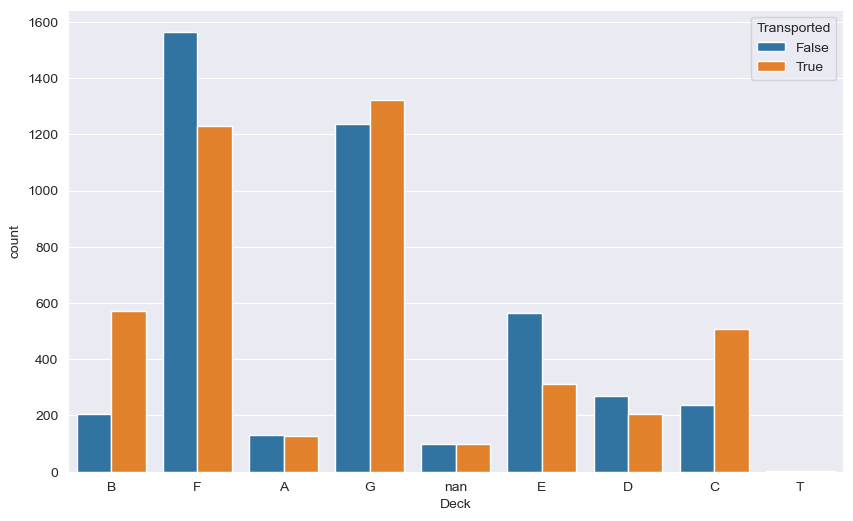

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(x='Deck',data=train,hue='Transported')
plt.show()

In [83]:
train = pd.merge(train,train['Deck'].value_counts().reset_index().rename({'Deck':'DeckFrequency'},axis=1),
         left_on = 'Deck',right_on='index').drop("index",axis=1)

### 3.1 Cabin - Num

<Figure size 1500x1700 with 0 Axes>

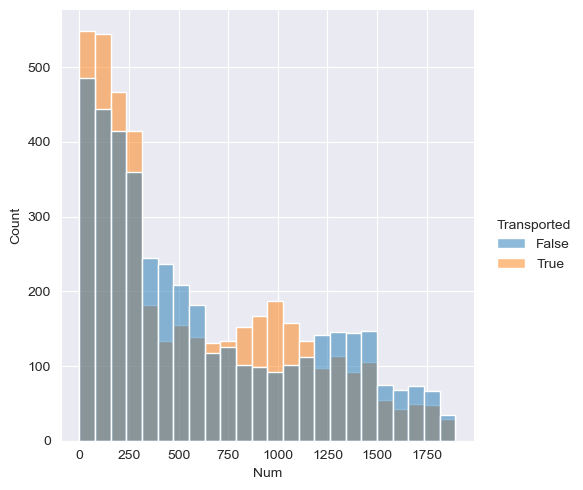

In [84]:
plt.figure(figsize=(15,17))
sns.displot(x='Num',data=train,hue='Transported')
plt.show()

In [85]:
train = pd.merge(train,train['Num'].value_counts().reset_index().rename({'Num':'NumFrequency'},axis=1),
         left_on = 'Num',right_on='index').drop("index",axis=1)

### 3.1 Cabin - Side

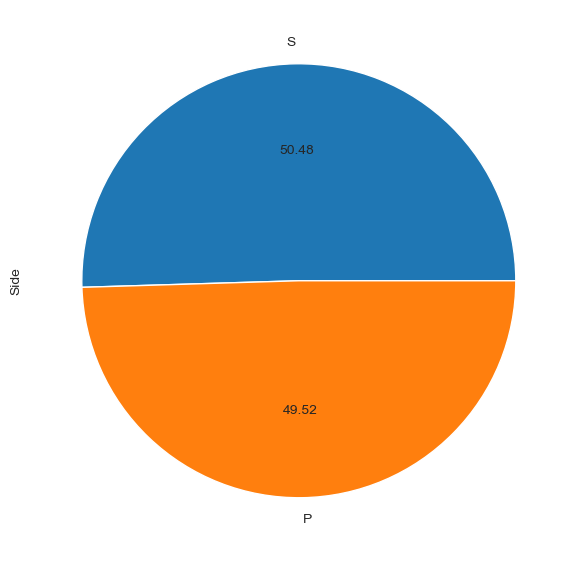

In [86]:
plt.figure(figsize=(7,8))
train['Side'].value_counts(dropna=False).plot(kind='pie',autopct='%2.2f')
plt.show()

In [87]:
train['SideSP'] = train['Side'].map({'S':1,'P':0,'nan':1})

In [88]:
#train.head()

# 4. Destination

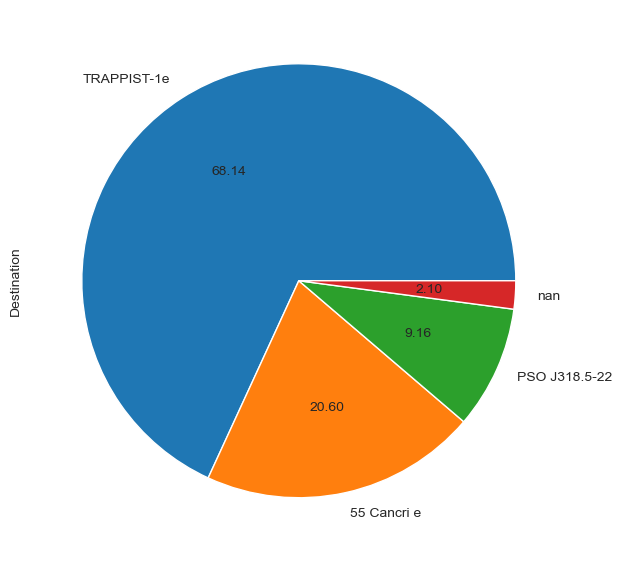

In [89]:
plt.figure(figsize=(7,8))
train['Destination'].value_counts(dropna=False).plot(kind='pie',autopct='%2.2f')
plt.show()

In [90]:
train = pd.concat((train,pd.get_dummies(train['Destination'])),axis=1)

# 4. Age

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


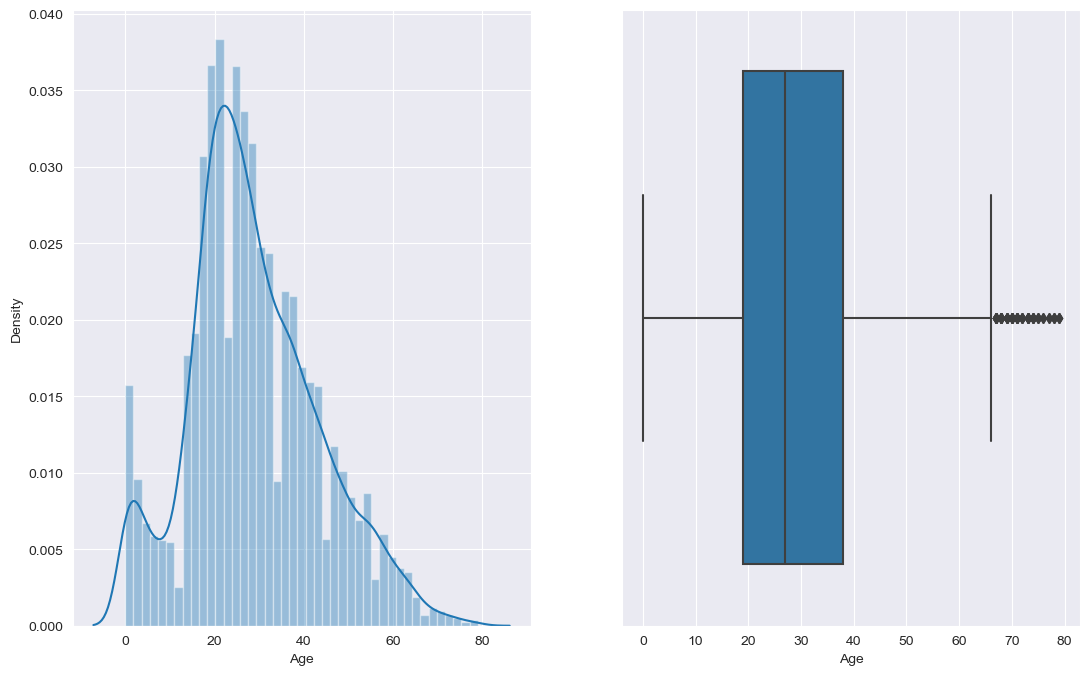

In [91]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.distplot(train['Age'])

plt.subplot(1,2,2)
sns.boxplot(x='Age',data=train)
plt.show()

In [92]:
train['Age'].mean()

28.82041110710422

In [93]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


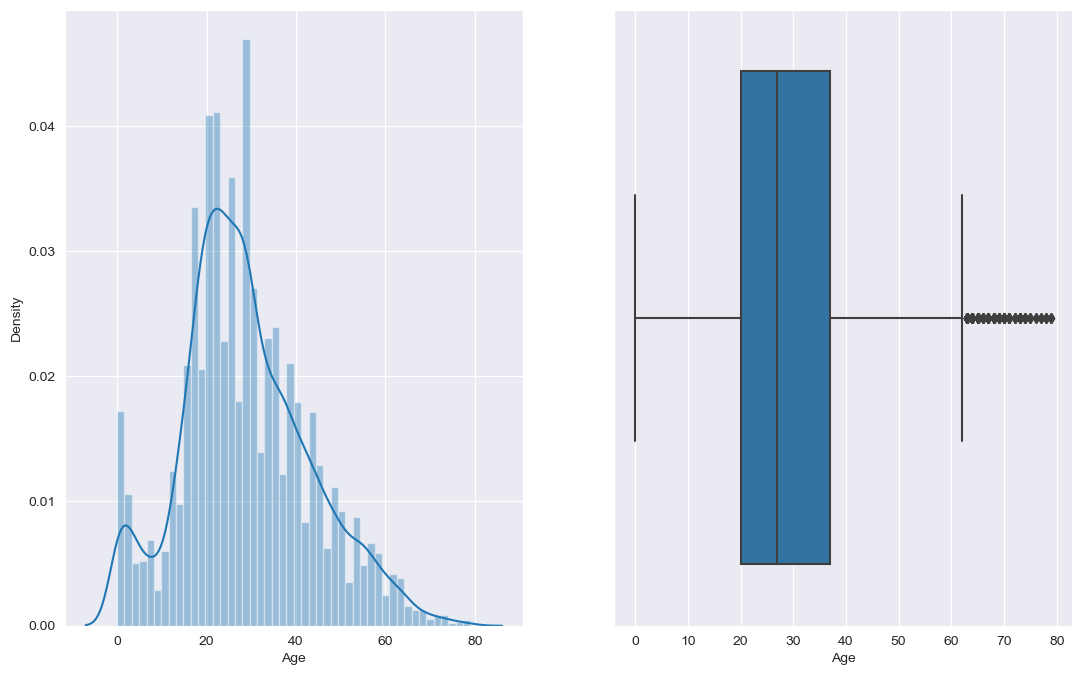

In [94]:
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
sns.distplot(train['Age'])

plt.subplot(1,2,2)
sns.boxplot(x='Age',data=train)
plt.show()

# 5. VIP

In [95]:
(train['VIP'].value_counts(dropna=False)/train.shape[0])*100

False    95.408524
NaN       2.319284
True      2.272192
Name: VIP, dtype: float64

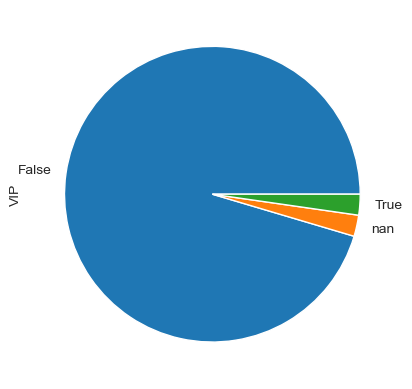

In [96]:
train['VIP'].value_counts(dropna=False).plot(kind='pie')
plt.show()

In [97]:
train['VIP'].fillna(False,inplace=True)

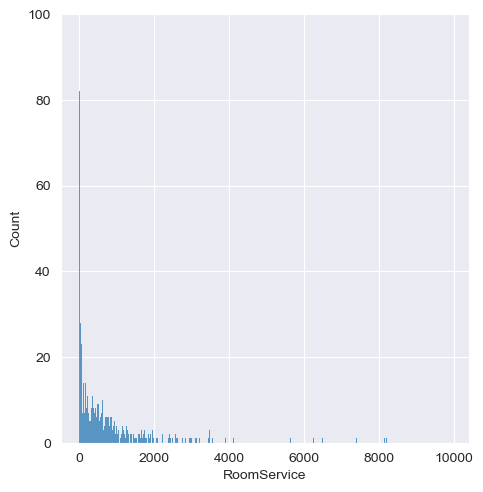

In [98]:
sns.displot(x='RoomService',data=train)
plt.ylim(0,100)
plt.show()

In [108]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Europa,Mars,Num,DeckFrequency,NumFrequency,SideSP,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
count,8494.000000,8317.000000,8316.000000,8288.000000,8313.000000,8310.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000,8494.000000
mean,28.820411,221.954671,457.992665,174.700531,306.623120,306.132371,0.243701,0.202731,600.367671,1952.105957,8.037203,0.504827,0.206028,0.091594,0.681422
std,14.338048,640.734593,1616.551099,608.668091,1119.076668,1148.895082,0.429340,0.402058,511.867226,963.741893,5.214669,0.500006,0.404474,0.288469,0.465952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.250000,779.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,427.000000,2559.000000,7.000000,1.000000,0.000000,0.000000,1.000000
75%,37.000000,48.000000,78.250000,28.000000,59.000000,46.750000,0.000000,0.000000,999.000000,2794.000000,12.000000,1.000000,0.000000,0.000000,1.000000
max,79.000000,9920.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000,1.000000,1894.000000,2794.000000,28.000000,1.000000,1.000000,1.000000,1.000000


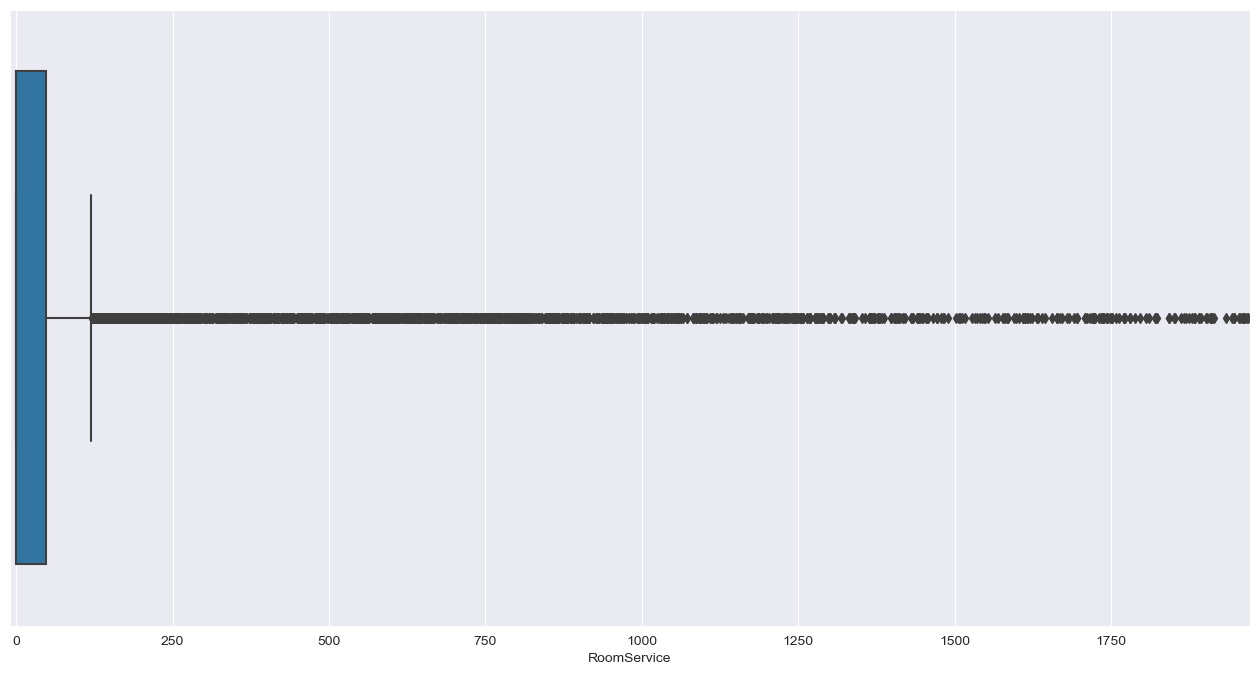

In [111]:
plt.figure(figsize=(16,8))
sns.boxplot(x='RoomService',data=train)
plt.xlim(-10,50+3*np.std(train['RoomService']))
plt.show()

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8493
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8494 non-null   object 
 1   HomePlanet     8299 non-null   object 
 2   CryoSleep      8284 non-null   object 
 3   Cabin          8494 non-null   object 
 4   Destination    8316 non-null   object 
 5   Age            8494 non-null   float64
 6   VIP            8494 non-null   bool   
 7   RoomService    8317 non-null   float64
 8   FoodCourt      8316 non-null   float64
 9   ShoppingMall   8288 non-null   float64
 10  Spa            8313 non-null   float64
 11  VRDeck         8310 non-null   float64
 12  Name           8296 non-null   object 
 13  Transported    8494 non-null   bool   
 14  Europa         8494 non-null   uint8  
 15  Mars           8494 non-null   uint8  
 16  CryoSleepBool  8494 non-null   bool   
 17  Deck           8494 non-null   object 
 18  Num     

In [65]:
((train['RoomService'].value_counts(dropna=False)/train['RoomService'].shape[0])*100)[:5]

0.0    64.127619
NaN     2.083824
1.0     1.365670
2.0     0.930068
3.0     0.682835
4.0     0.541559
5.0     0.329644
Name: RoomService, dtype: float64

In [60]:
def TransaformationFunction(df):
    # constant values from the train set 
    HomePlanetFreq = 'Earth'
    CryoSleepFreq = False
    AgeMean = 28.8204
    VIPFreq = False
    
    # create dummy indicator columns with HomePlanet as the default ~drop HomePlanet
    df = pd.concat((df,pd.get_dummies(df['HomePlanet'].fillna(HomePlanetFreq),drop_first=True)),axis=1)
    # convert the data type to boolean and fill missing values with false since they're less than 5%
    df['CryoSleepBool'] = df['CryoSleep'].fillna(CryoSleepFreq).apply(lambda m: bool(m))
    
    # extract the different columns from the table, deck name, port and number
    df['Deck'] = df['Cabin'].apply(lambda m: str(m).split("/")[0])
    # extract the numbers
    df['Num'] = df['Cabin'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
    df['Side'] = df['Cabin'].apply(lambda m: str(m).split("/")[-1])
    
    # replace the actual deck alphabet by the frequency of the deck passagers ~Drop deck
    df = pd.merge(df,df['Deck'].value_counts().reset_index().rename({'Deck':'DeckFrequency'},axis=1),
         left_on = 'Deck',right_on='index').drop("index",axis=1)
    
    # create a frequency variable for the cabin number
    df = pd.merge(df,df['Num'].value_counts().reset_index().rename({'Num':'NumFrequency'},axis=1),
         left_on = 'Num',right_on='index').drop("index",axis=1)
    
    # create indicator variable
    df['SideSP'] = df['Side'].map({'S':1,'P':0,'nan':-1})
    
    # create dummy variables for the destinations 
    df = pd.concat((df,pd.get_dummies(df['Destination'])),axis=1)
    
    # replace null values with mean 
    df['Age'].fillna(AgeMean,inplace=True)
    
    # replace with the most frequent value
    df['VIP'].fillna(VIPFreq,inplace=True)
    
    df = df.drop(['CryoSleep','Cabin','Deck','Num','Side','Destination','HomePlanet'],axis=1)
    
    return df